In [1]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd

In [2]:
data = pd.read_csv('../data/games-features.csv')
data.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

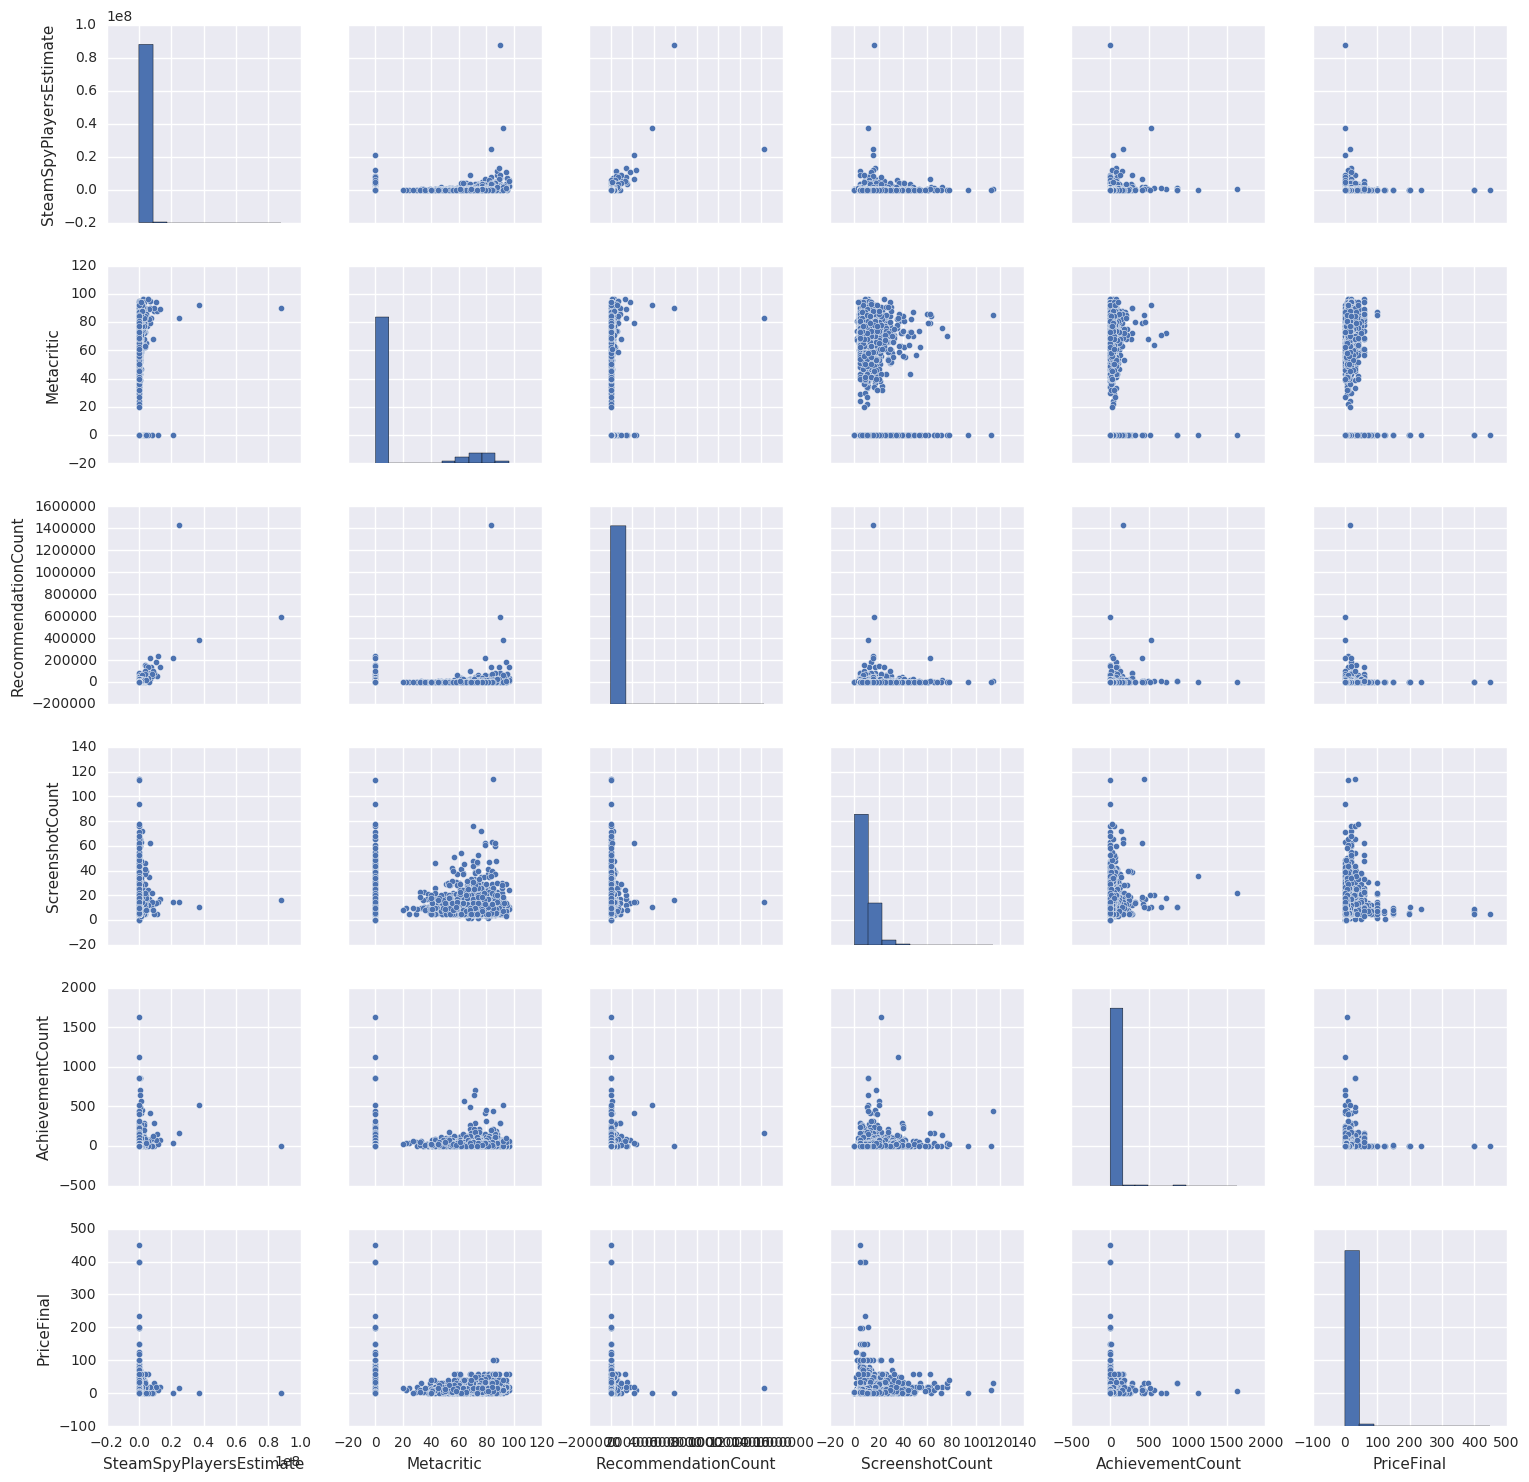

In [3]:
INTERESTING_NUMERICS = [
    "SteamSpyPlayersEstimate", 
    "Metacritic", 
    "RecommendationCount",
    "ScreenshotCount",
    "AchievementCount",
    "PriceFinal"
]   
    
sea.pairplot(data[INTERESTING_NUMERICS]);

SteamSpyPlayersEstimate
Using upper bound 217953
count      9068.000000
mean      26408.555249
std       42702.668336
min         524.000000
25%        1828.000000
50%        7314.000000
75%       29118.500000
max      217405.000000
Name: SteamSpyPlayersEstimate, dtype: float64
--------------------
Metacritic
Using upper bound 85
count    2016.000000
mean       70.152282
std        10.166462
min        20.000000
25%        65.000000
50%        72.000000
75%        78.000000
max        84.000000
Name: Metacritic, dtype: float64
--------------------
RecommendationCount
Using upper bound 5499
count    4375.000000
mean      799.722514
std      1017.680587
min       101.000000
25%       186.000000
50%       370.000000
75%       905.500000
max      5463.000000
Name: RecommendationCount, dtype: float64
--------------------
ScreenshotCount
Using upper bound 17
count    10560.000000
mean         8.523390
std          3.144953
min          1.000000
25%          6.000000
50%          8.000000
75%

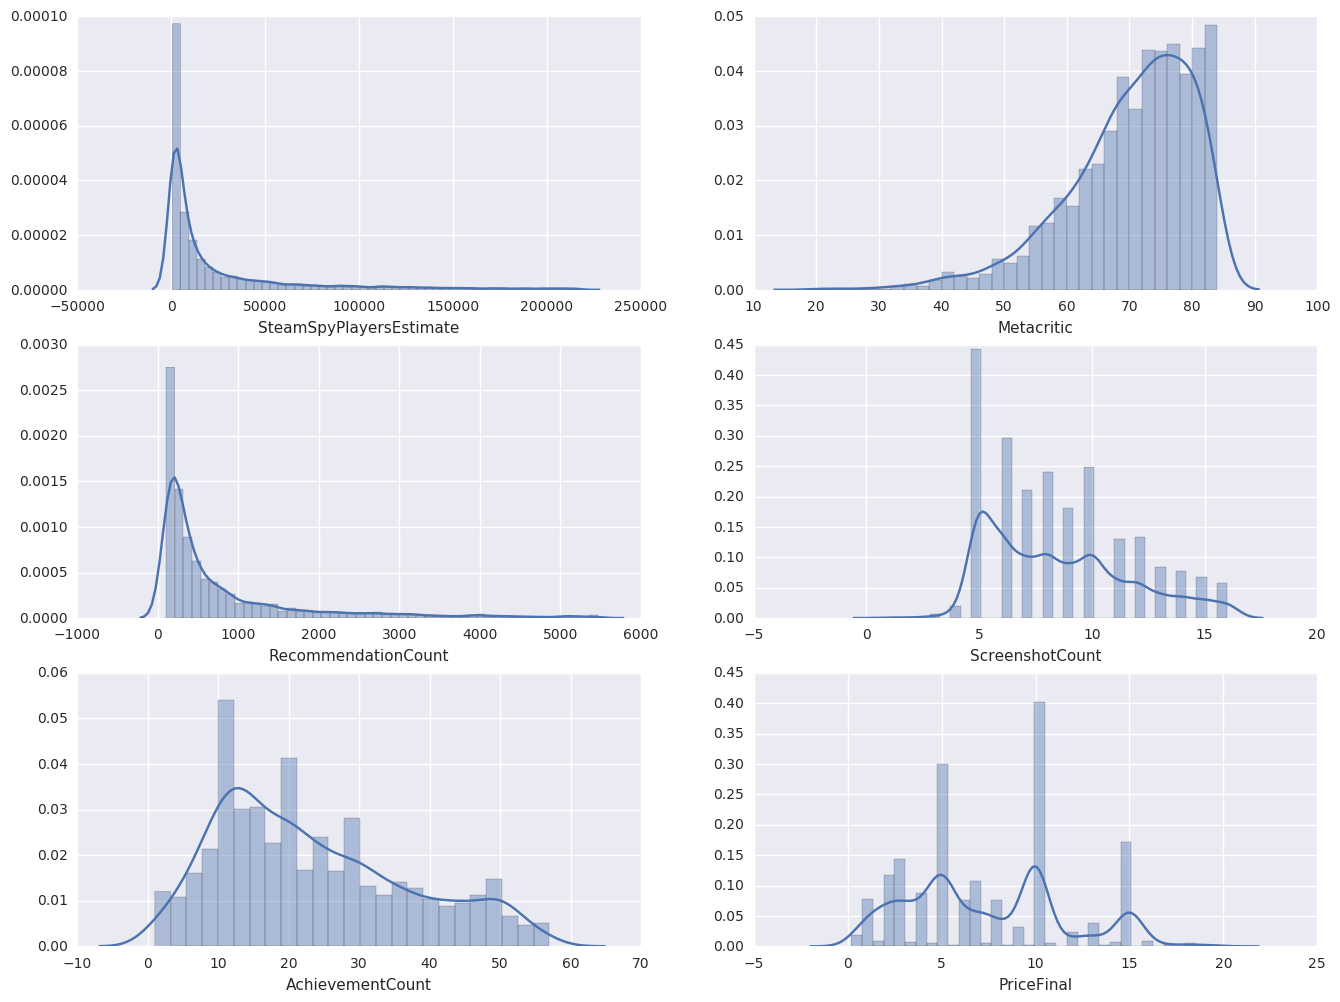

In [38]:
class PER:
    def __init__(self, per):
        self.per = per

def see_one(name, nonzero=True, bound=None, ax=None):
    print(name)
    d = data
    
    if nonzero:
        d = d[d[name] > 0.0]
    
    if bound:
        if isinstance(bound, PER):
            max_index = int(len(d[name]) * bound.per)
            bound = d[name].copy().sort_values().head(max_index).values[-1]
            print("Using upper bound", bound)
        d = d[d[name] < bound]
    
    d = d[name]
    
    print(d.describe())
    print('-'*20)
    if ax is None:
        plt.figure()
    sea.distplot(d, kde=True, rug=False, ax=ax)

fig, axes = plt.subplots(3, 2, figsize=(16,12));
for ax, col in zip(axes.flatten(), INTERESTING_NUMERICS):
    see_one(col, nonzero=True, bound=PER(0.90), ax=ax)